<div style="width: 30%; float: right; margin: 10px; margin-right: 5%;">
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d3/FHNW_Logo.svg/2560px-FHNW_Logo.svg.png" width="500" style="float: left; filter: invert(50%);"/>
</div>

<h1 style="text-align: left; margin-top: 10px; float: left; width: 60%;">
    npr Mini-Challenge 1: <br>EDA & Preprocessing
</h1>

<p style="clear: both; text-align: left;">
    Bearbeitet durch Florin Barbisch, Gabriel Torres Gamez und Jan Zwicky im HS 2023.
</p>

## Vorgegebenes Ziel

Wir evaluieren 3 verschiedene Klassifikationssysteme in einer Textklassifikationsaufgabe. <br><br>
Wir argumentieren, warum wir diese Systeme für diesen Fall ausgewählt haben, und bauen, trainieren und bewerten das System. <br><br>
Wir führen auch eine gründliche Fehleranalyse durch und schlagen Theorien zur Verbesserung der Systeme vor, <br>
insbesondere durch die Analyse einzelner Fälle und den Vergleich der Vorhersagen jedes Systems. <br>
Mindestens eines der Systeme basiert auf einem feinabgestimmten Deep-Learning-Modell.

Hier können wir Daten aus gemeinsamen Aufgaben verwenden, wie zum Beispiel Semeval, Kaggle, <br>Codalab oder Paperwithcode für die Textklassifikation.

## Requirements, Imports und Einstellungen
Hier werden die benötigten Python-Pakete importiert und die Einstellungen für die Plots
vorgenommen. 

In [1]:
# All Imports
import sys
import torch
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split

# Versions of the packages used
print(f"Python Version: {sys.version}")
print(f"PyTorch Version: {torch.__version__}")
print(f"Numpy Version: {np.__version__}")
print(f"Pandas Version: {pd.__version__}")
print(f"Matplotlib Version: {plt.matplotlib.__version__}")
print(f"Sklearn Version: {sklearn.__version__}")
print(f"Seaborn Version: {sns.__version__}")

# Warnings Settings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Numpy Settings
np.set_printoptions(precision=2, suppress=True)
np.random.seed(42)

# Matplotlib Settings
plt.rcParams["figure.figsize"] = (24, 12)

Python Version: 3.10.12 (main, Jun 20 2023, 19:43:52) [Clang 14.0.3 (clang-1403.0.22.14.1)]
PyTorch Version: 2.0.1
Numpy Version: 1.26.0
Pandas Version: 2.1.1
Matplotlib Version: 3.8.0
Sklearn Version: 1.3.1
Seaborn Version: 0.12.2


## Helper Functions

Hier werden Funktionen definiert, die bei beiden Modellen verwendet werden.

In [2]:
# Metrics, shortcuts, constants, etc.

## Gewählter Datensatz

Wir haben uns für den <a href="https://www.kaggle.com/competitions/nlp-getting-started/data">"Natural Language Processing with Disaster Tweets"</a> Datensatz entschieden.<br><br>
Der Datensatz passt zum Ziel der Mini Challenge, da er Textdaten aus Twitter enthält, die in Notfällen <br>als wichtiger Kommunikationskanal dienen. Dies ermöglicht die Entwicklung und Evaluierung von <br>Textklassifikationssystemen, um Tweets zu identifizieren, die echte Katastrophen ankündigen, <br>von solchen, die dies nicht tun. <br><br>Dies erfordert eine gründliche Fehleranalyse und die Entwicklung von Modellen, die in der Lage sind, <br>die Bedeutung von Wörtern und Ausdrücken im Kontext zu verstehen, da Tweets oft metaphorische <br>Sprache verwenden können. <br><br>Wir haben Zugriff auf einen Datensatz von 10.000 handklassifizierten Tweets, der eine solide <br>Grundlage für die Evaluierung und Verbesserung von Textklassifikationssystemen bietet.

## Explorative Datenanalyse

In [3]:
tweets = pd.read_csv("./data/train.csv", index_col="id", encoding="utf-8")
tweets.columns

Index(['keyword', 'location', 'text', 'target'], dtype='object')

Der Datensatz hat zum Text und dem Target noch die Spalten Keyword und Location. Diese werden wir für die Klassifikation nicht verwenden. Ein hybrides Modell könnte die Vorhersage verbessern.

In [4]:
tweets = tweets.loc[:,["text","target"]]

Im nächsten Schritt wird ein Trainings- und Testset erstellt. Dies wird zu diesem Zeitpunkt gemacht, damit wir keine Informationen über das Testset gewinnen.

In [5]:
train, test = train_test_split(tweets, test_size=0.2,random_state=10)

Im nächsten Schritt wird untersucht, ob es unbekannte oder doppelte Werte hat. 

In [6]:
print(f"Anzahl NA Werte: {train.isna().any().sum()}")
print(f"Anzahl doppelte Werte: {train['text'].duplicated().sum()}")

Anzahl NA Werte: 0
Anzahl doppelte Werte: 77


Es hat keine NA Werte, aber diverse doppelte Werte. Im nächsten Schritt wird untersucht, ob alle doppelten Werte den gleichen Target Wert hat.

In [7]:
tweets[tweets["text"].duplicated() &  (tweets.duplicated() == False)]

,text,target
id,,
898,To fight bioterrorism sir.,0
1922,Mmmmmm I'm burning.... I'm burning buildings I...,0
1950,like for the music video I want some real acti...,0
1968,I Pledge Allegiance To The P.O.P.E. And The Bu...,1
4076,.POTUS #StrategicPatience is a strategy for #G...,0
4659,He came to a land which was engulfed in tribal...,1
5699,Who is bringing the tornadoes and floods. Who ...,0
6017,Caution: breathing may be hazardous to your he...,0
6031,#foodscare #offers2go #NestleIndia slips into ...,0


In [8]:
tweets[tweets["text"] == "To fight bioterrorism sir."]

,text,target
id,,
881,To fight bioterrorism sir.,1
898,To fight bioterrorism sir.,0
907,To fight bioterrorism sir.,1
916,To fight bioterrorism sir.,0


Diese Werte kommen mehrmals vor. Dies lassen wir so im Trainingsset. Da dadurch auch die Unsicherheit eines Textes trainiert werden kann. Das Modell sollte sich bei einem mehrdeutigen Text unsicher sein, ob sich tatsächlich eine Katastrophe ankündigt.

In [9]:
tweets.target.drop_duplicates()

id
1     1
23    0
Name: target, dtype: int64

Als Target sind die Erwarteten Werte vorhanden.

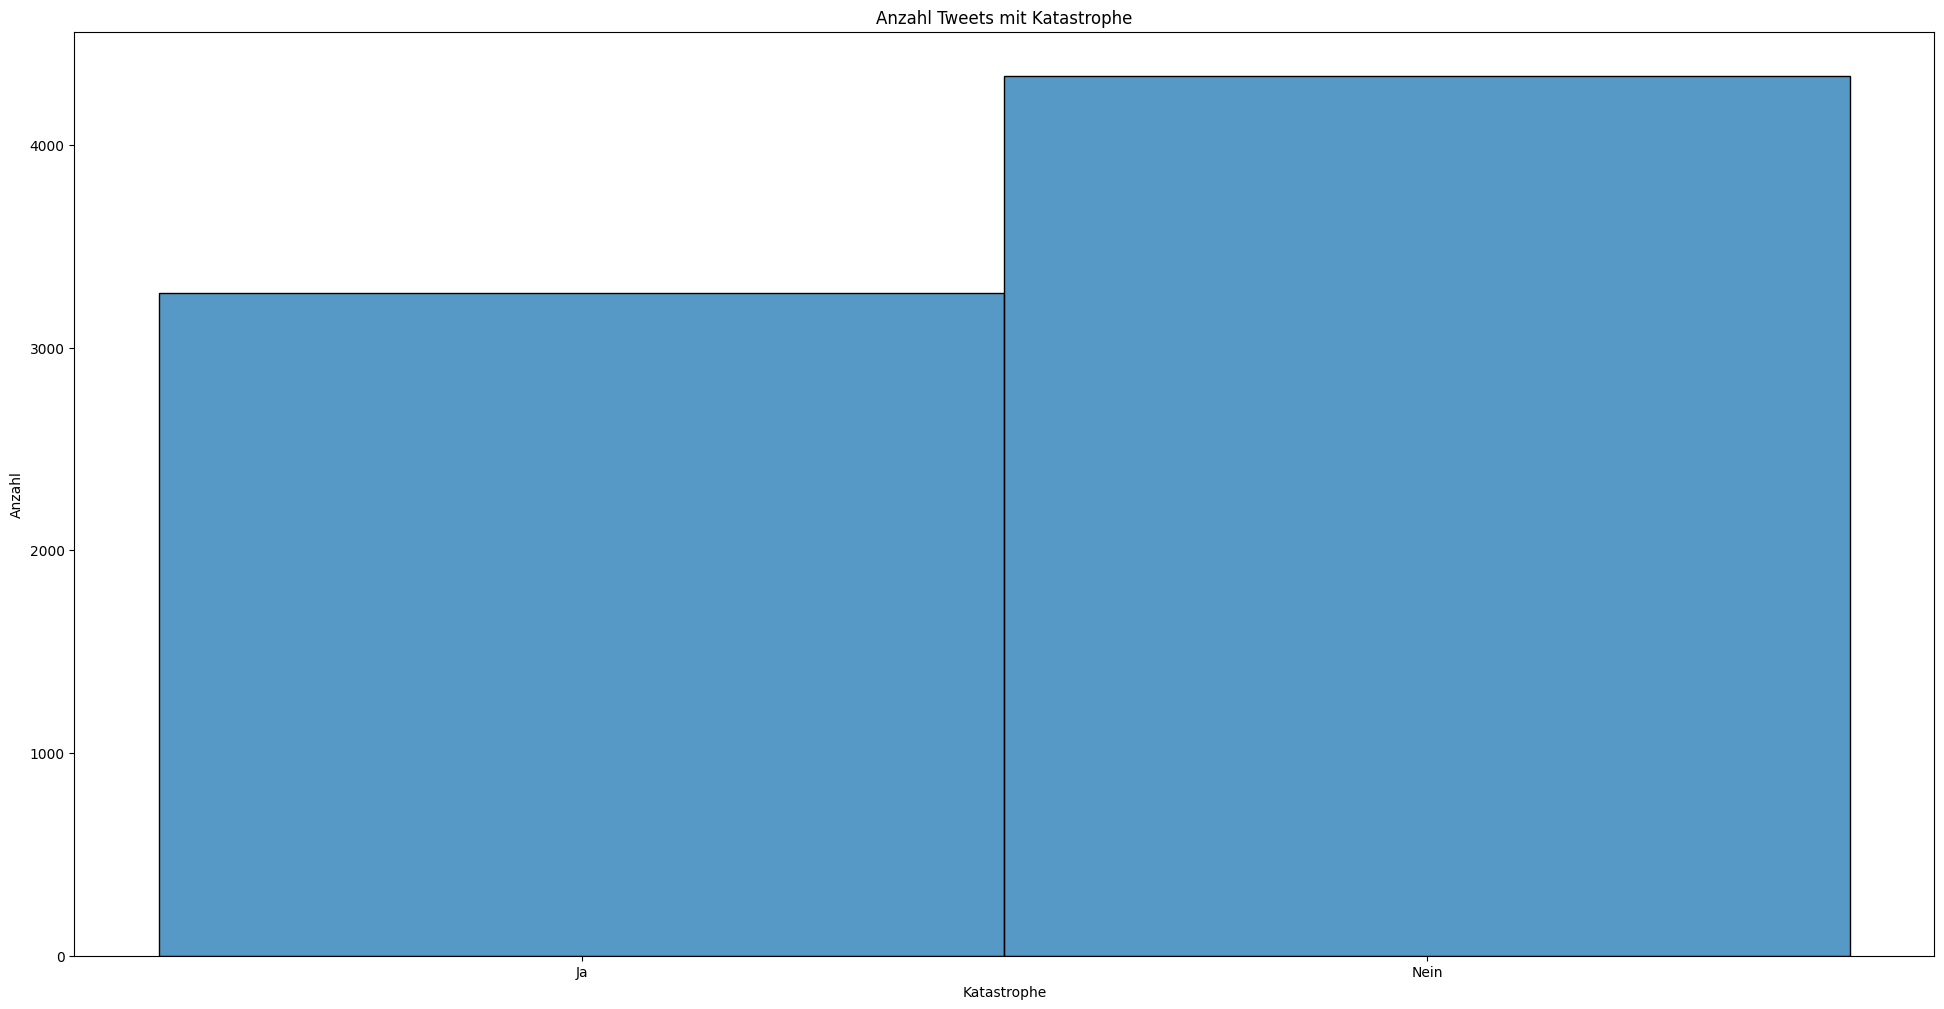

In [10]:
sns.histplot(tweets["target"].replace({0:"Nein",1:"Ja"}))
plt.title("Anzahl Tweets mit Katastrophe")
plt.ylabel("Anzahl")
plt.xlabel("Katastrophe")
plt.show()

Es hat nicht gleiche viele Tweets von beiden Klassen. Dies hat einen Einfluss auf die Metrik, die ausgewählt wird.

### TF-IDF (TODO)

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Nulla euismod, nisl eget aliquam ultricies, nunc nisl ultricies nunc, eget aliq

## Data Preprocessing